## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





frequenza per 10 lanci: 40.00%
frequenza per 210 lanci: 54.03%
frequenza per 410 lanci: 51.57%
frequenza per 610 lanci: 47.64%
frequenza per 810 lanci: 48.23%
frequenza per 1010 lanci: 52.31%
frequenza per 1210 lanci: 50.12%
frequenza per 1410 lanci: 48.91%
frequenza per 1610 lanci: 49.72%
frequenza per 1810 lanci: 51.07%
frequenza per 2010 lanci: 51.11%
frequenza per 2210 lanci: 48.99%
frequenza per 2410 lanci: 51.62%
frequenza per 2610 lanci: 50.00%
frequenza per 2810 lanci: 49.75%
frequenza per 3010 lanci: 51.38%
frequenza per 3210 lanci: 49.54%
frequenza per 3410 lanci: 48.87%
frequenza per 3610 lanci: 50.80%
frequenza per 3810 lanci: 47.89%
frequenza per 4010 lanci: 50.32%
frequenza per 4210 lanci: 50.33%
frequenza per 4410 lanci: 49.75%
frequenza per 4610 lanci: 49.74%
frequenza per 4810 lanci: 50.93%
frequenza per 5010 lanci: 50.48%
frequenza per 5210 lanci: 51.07%
frequenza per 5410 lanci: 49.55%
frequenza per 5610 lanci: 49.87%
frequenza per 5810 lanci: 50.35%
frequenza per 60

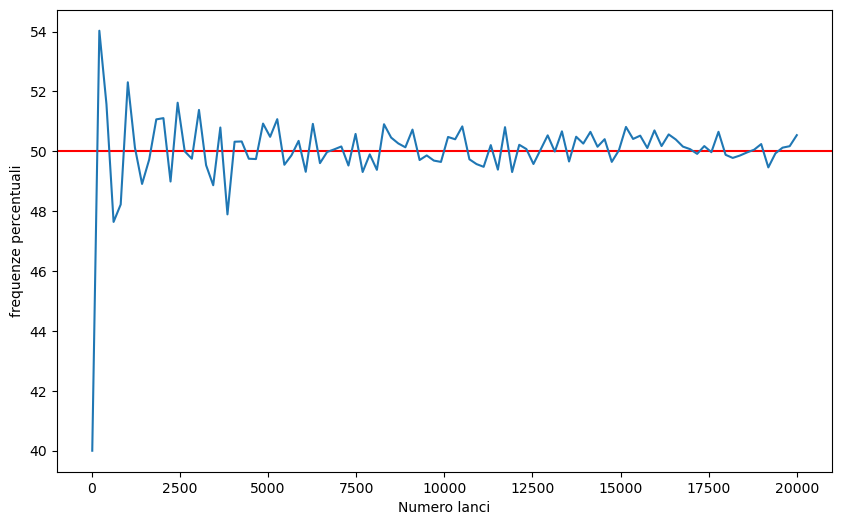

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# funzione che simula il lancio della moneta
def simula_moneta(n_lanci):
    #0=croce 1=testa
    lanci = np.random.choice([0,1], size=n_lanci)
    df = pd.DataFrame(lanci, columns=['Risultato'])
    df['Esito']=df['Risultato'].map({0: 'Croce', 1: 'Testa'})

    frequenze = df['Esito'].value_counts(normalize=True)*100

    return frequenze

# frequenza percentuale con le grandezze del campione
campioni = np.linspace(10, 20_000, 100, dtype=int)
frequenze_testa = []

for n in campioni:
    lanci = simula_moneta(n)
    frequenze_testa.append(lanci.get('Testa', 0))

for i, value in enumerate(frequenze_testa):
    print(f'frequenza per {10 + i *200} lanci: {value:.2f}%')

print(frequenze_testa)

# plot
plt.figure(figsize=(10,6))
plt.axhline(50, color='red')
plt.plot(campioni, frequenze_testa)
plt.xlabel('Numero lanci')
plt.ylabel('frequenze percentuali')
plt.show()


## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mostrando insieme i dati di uomini e donne

In [70]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print('righe: ', df.shape[0])
print('colonne: ', df.shape[1])

print('\nvalori mancanti per colonna: ')
print(df.isna().sum())

embarked_moda = df['Embarked'].mode()
df['Embarked'] = df['Embarked'].fillna(embarked_moda)

df = df[df['Age'].notna()]

print('\nrighe duplicate: ', df.duplicated().sum())

print('età media per classe: ')
print(df.groupby('Pclass')['Age'].mean())

righe:  891
colonne:  12

valori mancanti per colonna: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

righe duplicate:  0
età media per classe: 
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


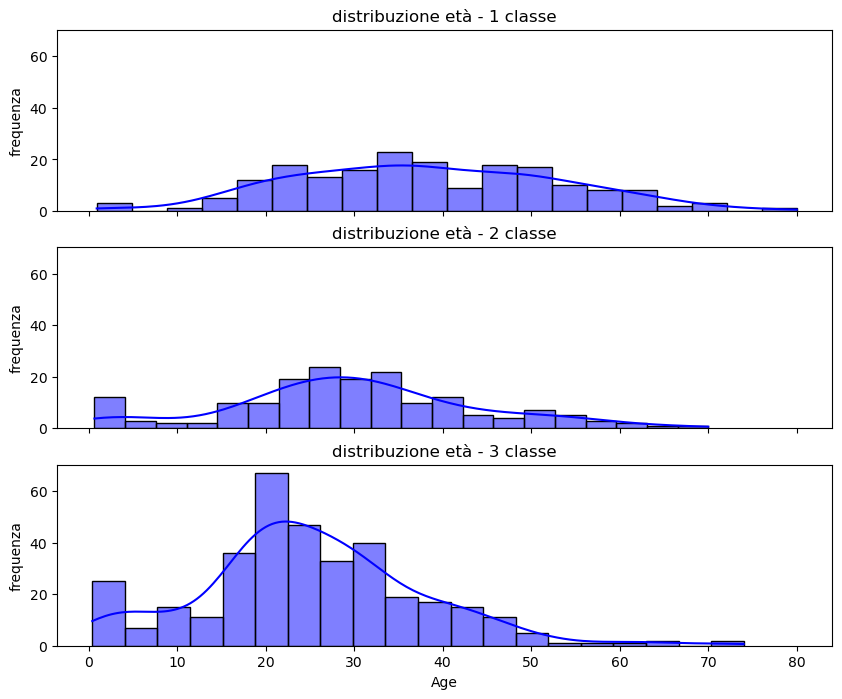

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,8), sharex=True, sharey=True)

#primo grafico
sns.histplot(data=df[df['Pclass'] ==1], x='Age', ax=ax1, bins=20, kde=True, color='blue')
ax1.set_title('distribuzione età - 1 classe')

#secondo grafico
sns.histplot(data=df[df['Pclass'] == 2], x='Age', ax=ax2, bins=20, kde=True, color='blue')
ax2.set_title('distribuzione età - 2 classe')

#terzo grafico
sns.histplot(data=df[df['Pclass'] == 3], x='Age', ax=ax3, bins=20, kde=True, color='blue')
ax3.set_title('distribuzione età - 3 classe')


ax1.set_ylabel('frequenza')
ax2.set_ylabel('frequenza')
ax3.set_ylabel('frequenza')

plt.show()

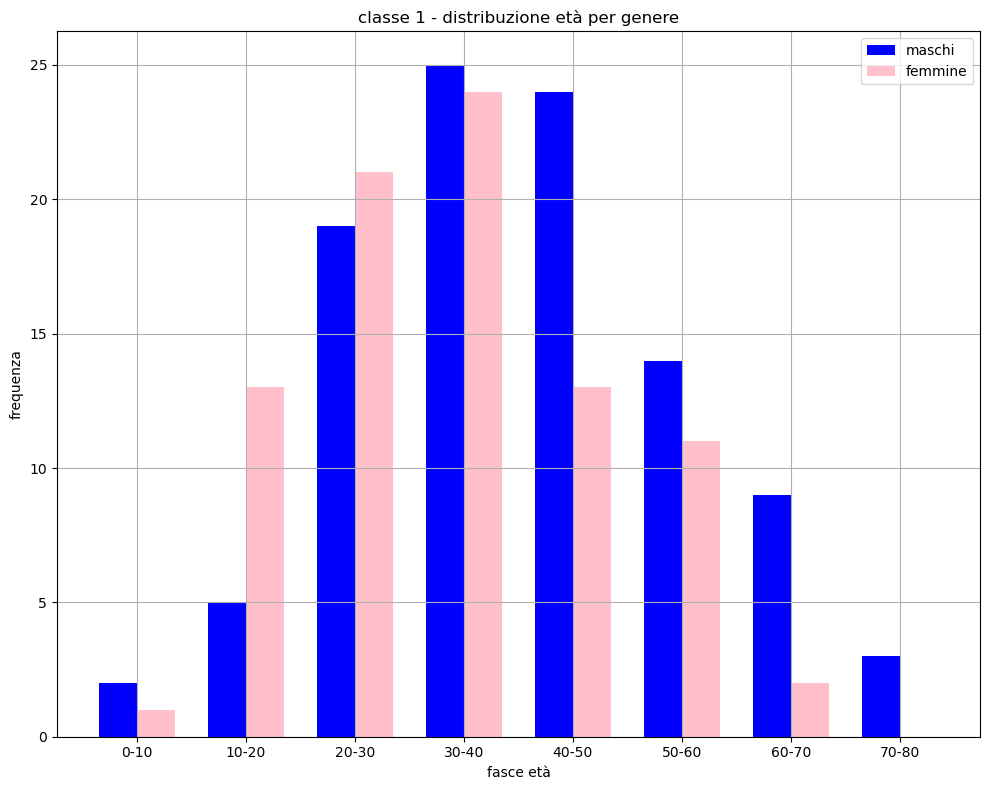

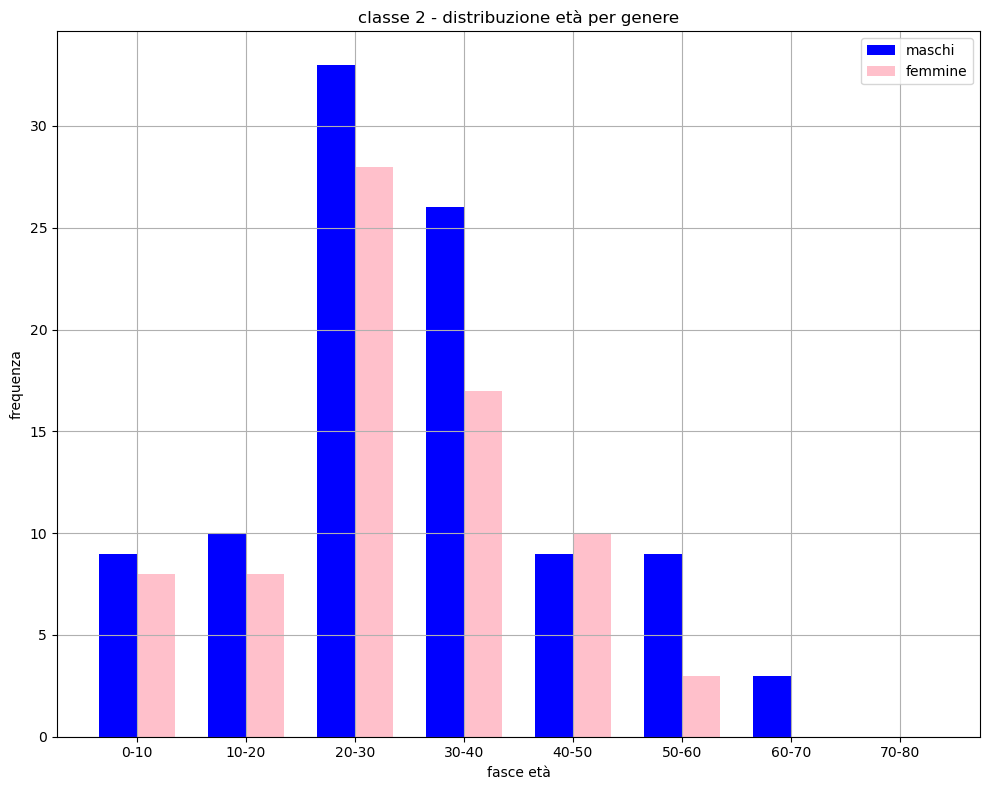

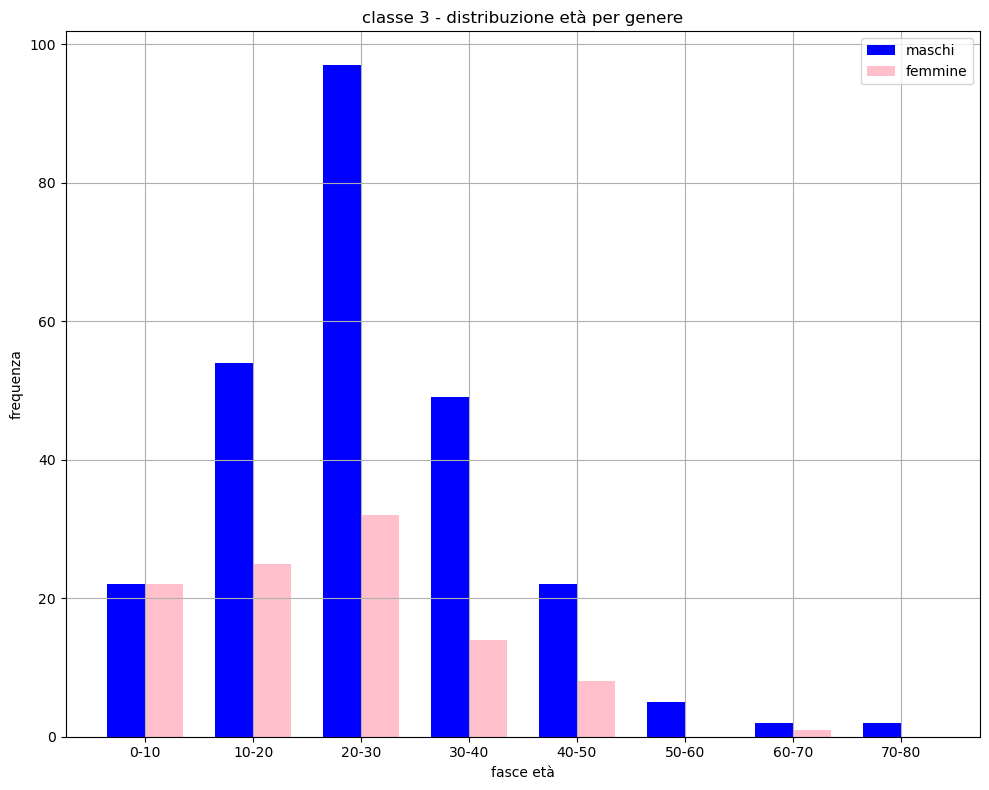

In [80]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['GroupAge'] = pd.cut(df['Age'], bins=bins, labels=labels)

for pclass in range(1,4):
    df_class = df[df['Pclass'] == pclass]

    group = df_class.groupby(['GroupAge', 'Sex'], observed=False).size().unstack(fill_value=0)

    freq_m = group.get('male', pd.Series([0]*len(labels), index=labels))
    freq_f = group.get('female', pd.Series([0]*len(labels), index=labels))

    x = np.arange(len(labels))
    bar_width = 0.35

    plt.figure(figsize=(10,8))

    plt.bar(x - bar_width/2, freq_m, width=bar_width, label='maschi', color='blue')
    plt.bar(x + bar_width/2, freq_f, width=bar_width, label='femmine', color='pink')

    plt.title(f'classe {pclass} - distribuzione età per genere')
    plt.xlabel('fasce età')
    plt.ylabel('frequenza')
    plt.xticks(x, labels)

    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
print('distribuzione delle specie: ')
print(df['species'].value_counts())

print('\n', df.groupby('species')[['petal_length', 'petal_width']].mean())

distribuzione delle specie: 
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

             petal_length  petal_width
species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026


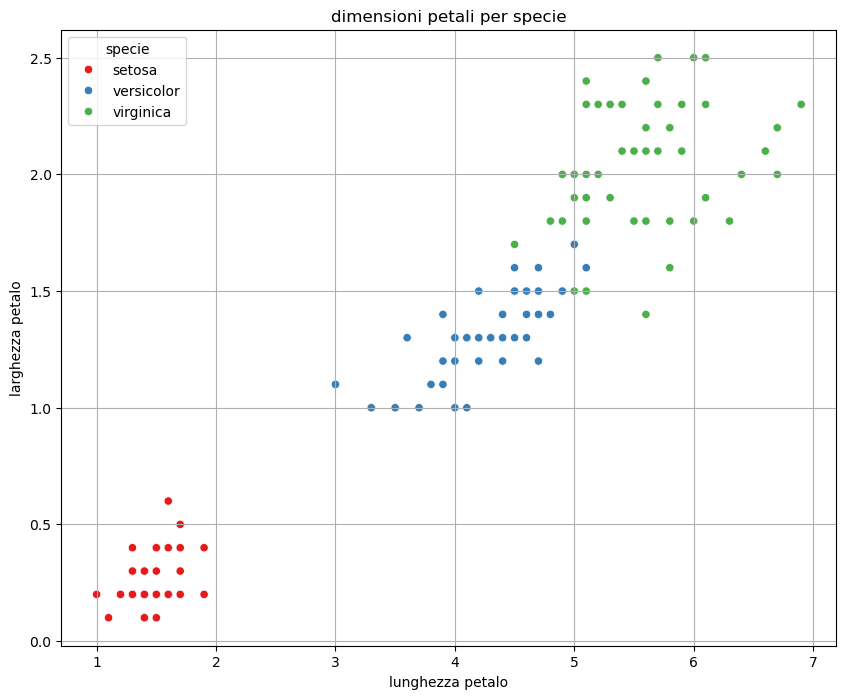

In [56]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette='Set1')

plt.title('dimensioni petali per specie')
plt.xlabel('lunghezza petalo')
plt.ylabel('larghezza petalo')
plt.legend(title='specie')

plt.grid(True)
plt.show()

In [61]:
#colonna per area del petalo
df['petal_area'] = df['petal_length']*df['petal_width']

print(df.head())
print("\nmedia dell'area per specie", df.groupby('species')['petal_area'].mean())

   sepal_length  sepal_width  petal_length  petal_width species  petal_area
0           5.1          3.5           1.4          0.2  setosa        0.28
1           4.9          3.0           1.4          0.2  setosa        0.28
2           4.7          3.2           1.3          0.2  setosa        0.26
3           4.6          3.1           1.5          0.2  setosa        0.30
4           5.0          3.6           1.4          0.2  setosa        0.28

media dell'area per specie species
setosa         0.3656
versicolor     5.7204
virginica     11.2962
Name: petal_area, dtype: float64


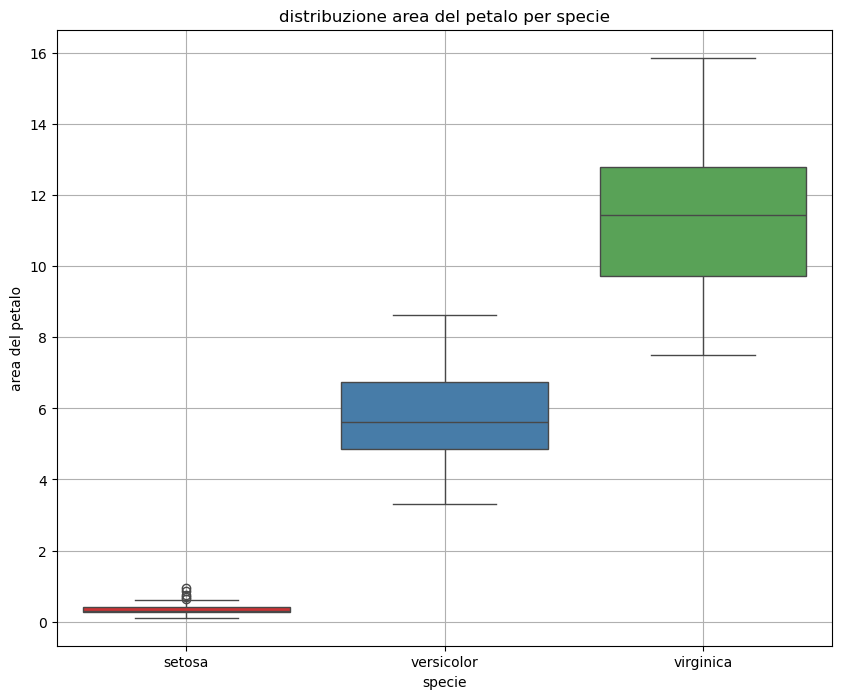

In [67]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='species', y='petal_area', hue='species', palette='Set1', legend=False)
plt.title('distribuzione area del petalo per specie')
plt.xlabel('specie')
plt.ylabel('area del petalo')
plt.grid(True)
plt.show()